In [1]:
import joblib
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', None)


In [2]:
df = fetch_openml(name = 'credit', version= 1)
x = df.data
y = df.target
x.describe().columns
y.describe()
# x.info()
numericke = list(x.describe().columns)
kategorije = list(set(x.columns) - set(numericke))

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numericke),
                                               ('kat', OneHotEncoder(drop='first', handle_unknown='ignore'), kategorije)])

logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=4000, C = 7))  
])
svc = Pipeline([
    ('preprocessing', preprocessor),
    ('model', SVC(C=8))  
])
rf = RandomForestClassifier(n_estimators=200)

def namesti(model):
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)    
    print(f"Tačnost modela: {accuracy_score(ytest, pred):.4f}")
    print(confusion_matrix(ytest, pred), ytest.value_counts())
    # print(f"\nModel: {model.named_steps['model'].__class__.__name__}")


In [83]:
def namesti(model):
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)    
    acc = accuracy_score(ytest, pred)
    cm = confusion_matrix(ytest, pred)
    
    print(f"\nModel: {model.named_steps['model'].__class__.__name__}")
    print(f"Tačnost modela: {acc:.4f}")
    print("Matrica konfuzije:")
    print(cm)
    print(ytest.value_counts())
    # ROC-AUC samo ako model podržava predict_proba
    if hasattr(model.named_steps['model'], "predict_proba"):
        y_pred_prob = model.predict_proba(xtest)[:, 1]
        roc_auc = roc_auc_score(ytest, y_pred_prob)
        
        # Crtanje ROC krive
        fpr, tpr, _ = roc_curve(ytest, y_pred_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model.named_steps["model"].__class__.__name__}')
        plt.legend(loc="lower right")
        plt.show()

        print(f"ROC-AUC Score: {roc_auc:.4f}")

In [36]:
def crtaj(model):
    trening = np.linspace(150, len(xtrain), 70).astype(int)
    f1train = []
    for i in trening:
        xs = xtrain.iloc[:i]
        ys = ytrain.iloc[:i]
        model.fit(xs,ys)
        pred = model.predict(xs)
        score = f1_score(ys, pred, average='binary')
        f1train.append(score)
    
    f1test = []
    for i in trening:
        xs = xtrain.iloc[:i]
        ys = ytrain.iloc[:i]
        model.fit(xs,ys)
        pred = model.predict(xtest)
        score = f1_score(ytest, pred, average='binary')
        f1test.append(score)
    plt.figure(figsize=(8, 6))
    plt.plot(trening, f1train, marker='o', label='Trening F1-score')
    plt.plot(trening, f1test, marker='o',label='Test F1-score')
    plt.xlabel("Veličina trening skupa")
    plt.ylabel("F1-score")
    plt.title("F1-score u odnosu na veličinu trening skupa")
    plt.xlim(150, 13371)
    plt.ylim(0.6, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
def score(model):    
    rez = cross_val_score(model, x, y,scoring="accuracy", cv=5)
    accuracy = {'prosek' : rez.mean(),
                'std' : rez.std()}
    rezroc = cross_val_score(model, x, y,scoring="roc_auc", cv=5)
    roc = {'prosek' : rezroc.mean(),
            'std' : rezroc.std()}
    return accuracy, roc

In [6]:
x.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

joblib.dump(gridLogit.best_estimator_, 'logit.pkl')

In [7]:
logit = joblib.load('logit.pkl')

In [25]:
logit.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents']),
                                                 ('kat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('model', LogisticRegression(C=100, max_iter=1000))])

In [33]:
score(logit)

({'prosek': np.float64(0.725439922608636),
  'std': np.float64(0.008720658265460006)},
 {'prosek': np.float64(0.7961968966930644),
  'std': np.float64(0.008210952965245613)})


Model: LogisticRegression
Tačnost modela: 0.7278
Matrica konfuzije:
[[1379  292]
 [ 618 1054]]
SeriousDlqin2yrs
1.0    1672
0.0    1671
Name: count, dtype: int64


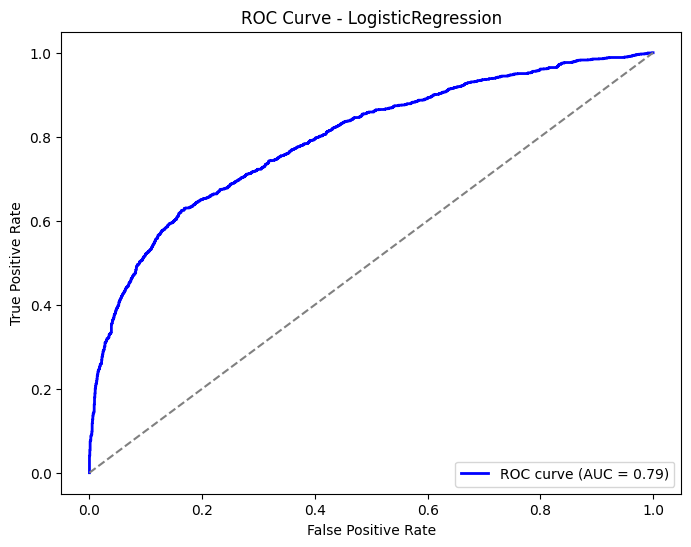

ROC-AUC Score: 0.7942


In [40]:
namesti(logit)

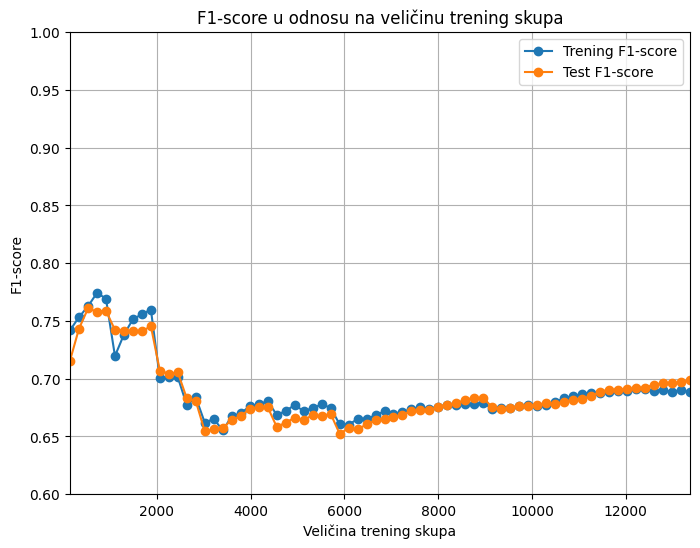

In [41]:
crtaj(logit)

In [42]:
svc = joblib.load('SVC.pkl')

In [78]:
%%time
score(svc)

CPU times: total: 12min 35s
Wall time: 12min 56s


({'prosek': np.float64(0.7469186397150238),
  'std': np.float64(0.002652383711326367)},
 {'prosek': np.float64(0.8151644050226954),
  'std': np.float64(0.005776231159607763)})


Model: SVC
Tačnost modela: 0.7478
Matrica konfuzije:
[[1454  217]
 [ 626 1046]]
SeriousDlqin2yrs
1.0    1672
0.0    1671
Name: count, dtype: int64


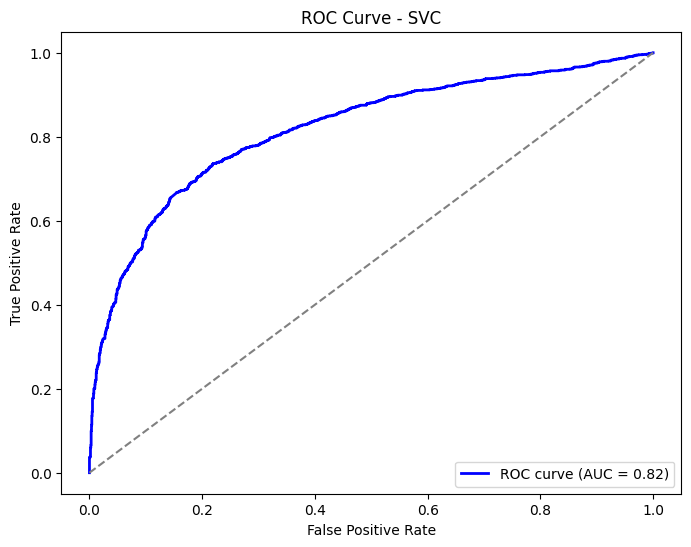

ROC-AUC Score: 0.8190
CPU times: total: 1min 24s
Wall time: 1min 38s


In [79]:
%%time
namesti(svc)

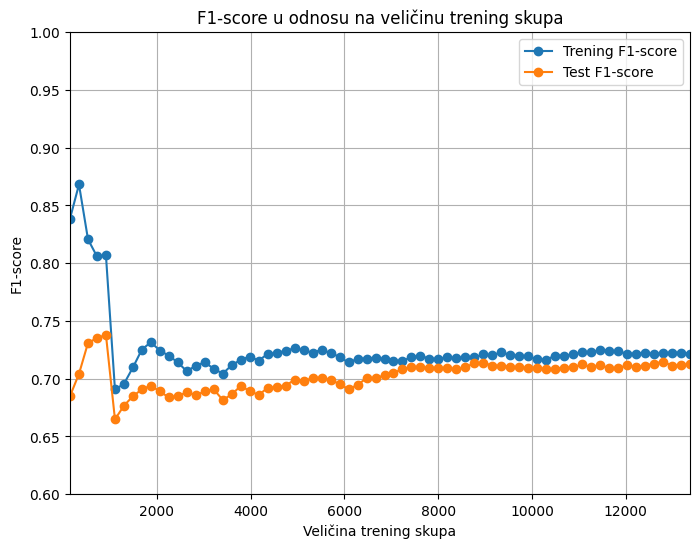

CPU times: total: 20min 29s
Wall time: 21min 41s


In [49]:
%%time
crtaj(svc)

In [81]:
rf = joblib.load('rf.pkl')

Tačnost modela: 0.7780
Matrica konfuzije:
[[1312  359]
 [ 383 1289]]
SeriousDlqin2yrs
1.0    1672
0.0    1671
Name: count, dtype: int64


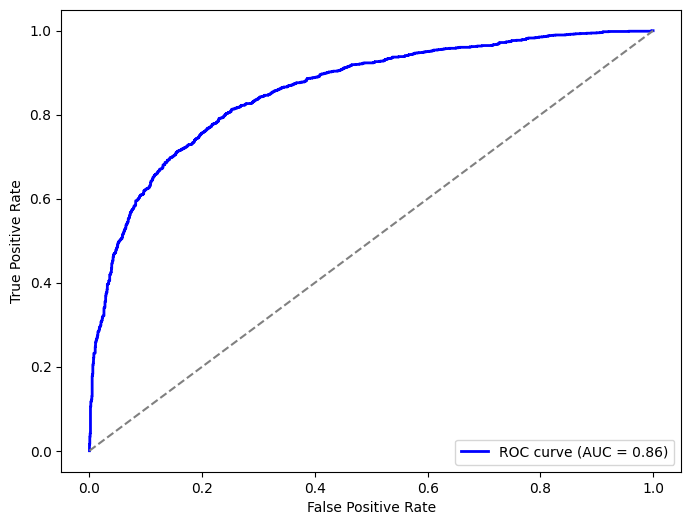

ROC-AUC Score: 0.8581
CPU times: total: 1.59 s
Wall time: 1.68 s


In [88]:
%%time
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
acc = accuracy_score(ytest, pred)
cm = confusion_matrix(ytest, pred)
    
print(f"Tačnost modela: {acc:.4f}")
print("Matrica konfuzije:")
print(cm)
print(ytest.value_counts())

y_pred_prob = rf.predict_proba(xtest)[:, 1]
roc_auc = roc_auc_score(ytest, y_pred_prob)

# Crtanje ROC krive
fpr, tpr, _ = roc_curve(ytest, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print(f"ROC-AUC Score: {roc_auc:.4f}")

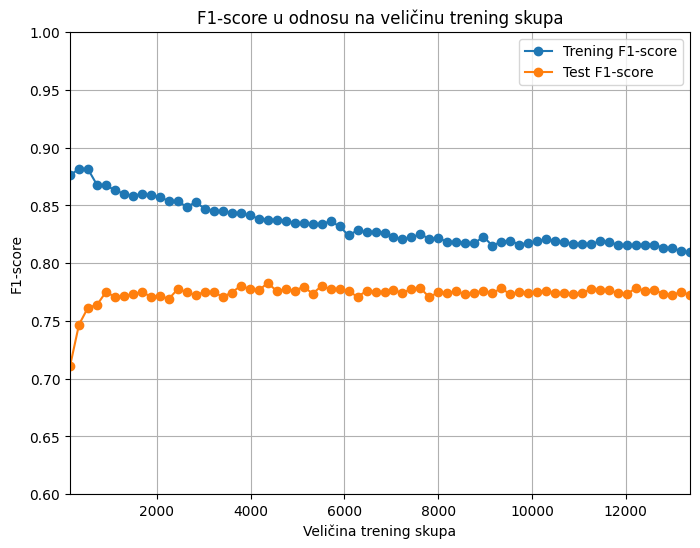

CPU times: total: 1min 50s
Wall time: 1min 54s


In [90]:
%%time
crtaj(rf)